In [1]:
# importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
train=pd.read_csv("E:/train_ctrUa4K.csv")
test=pd.read_csv("E:/test_lAUu6dG.csv")
sample=pd.read_csv("E:/sample_submission_49d68Cx.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking shape
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Get the summery statistics

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Steps of operations to be performed on the dataset
### 1.Look for null values in a dataset
### 2.Categorical Encoding 
### 3.Removing the unwantd columns after encoding 
### 4.Choose the model and train the dataset
### 5.Check the training accuracy_score
### 6.Predict the output values for testing data
### 7.Check the accuracy_score for testing data predicted values

In [7]:
#checking null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.isnull().sum().count()

13

In [9]:
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking data type

In [11]:
train.dtypes.head()

Loan_ID       object
Gender        object
Married       object
Dependents    object
Education     object
dtype: object

In [12]:
train.select_dtypes(include="object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y


# By usging sklearn and LableEncoder.....

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb= LabelEncoder()

In [62]:
train['NLoan_ID']=lb.fit_transform(train['Loan_ID'])
train['NGender']=lb.fit_transform(train['Gender'])
train['NMarried']=lb.fit_transform(train['Married'])
train['NDependents']=lb.fit_transform(train['Dependents'])
train['NEducation']=lb.fit_transform(train['Education'])
train['NSelf_Employed']=lb.fit_transform(train['Self_Employed'])
train['NProperty_Area']=lb.fit_transform(train['Property_Area'])
train['NLoan_Status']=lb.fit_transform(train['Loan_Status'])

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,NLoan_ID,NGender,NMarried,NDependents,NEducation,NSelf_Employed,NProperty_Area,NLoan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,0,1,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,1,1,1,0,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,2,1,1,0,1,0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,3,1,0,0,0,0,2,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,Urban,Y,4,1,1,2,0,1,2,1


# Now we drope the chatacrical column.....

In [17]:
train.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [18]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,NLoan_ID,NGender,NMarried,NDependents,NEducation,NSelf_Employed,NProperty_Area,NLoan_Status
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,2,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,3,1,0,0,0,0,2,1
5,5417,4196.0,267.0,360.0,1.0,4,1,1,2,0,1,2,1


# Here we observe the column ApplicantIncome,CoapplicantIncome,	LoanAmount and Loan_Amount_Term having big values....

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [20]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
train_scaler=train[col]
train[col]=std.fit_transform(train_scaler)

In [21]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,NLoan_ID,NGender,NMarried,NDependents,NEducation,NSelf_Employed,NProperty_Area,NLoan_Status
1,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,1,1,1,0,0,0,0
2,-0.417536,-0.604633,-0.979001,0.275542,1.0,1,1,1,0,0,1,2,1
3,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1,1,0,1,0,2,1
4,0.112280,-0.604633,-0.046446,0.275542,1.0,3,1,0,0,0,0,2,1
5,0.009319,0.999978,1.520245,0.275542,1.0,4,1,1,2,0,1,2,1


### Checking for outliers..

<AxesSubplot:xlabel='LoanAmount'>

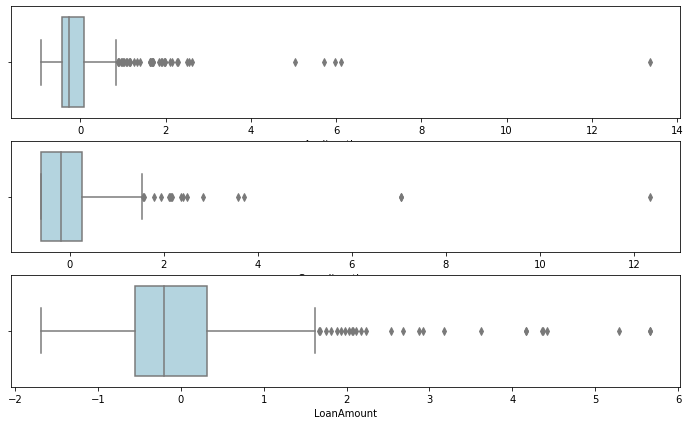

In [22]:
plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
sns.boxplot(x=train.ApplicantIncome,color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x=train.CoapplicantIncome,color='lightblue')


plt.subplot(3,1,3)
sns.boxplot(x=train.LoanAmount,color='lightblue')






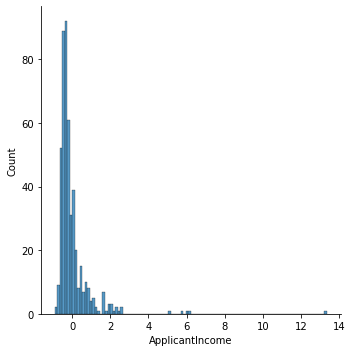

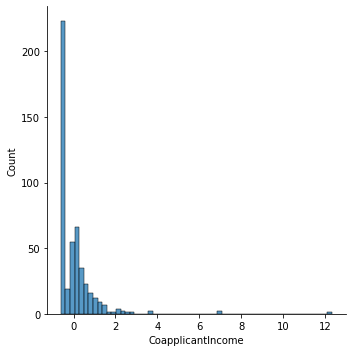

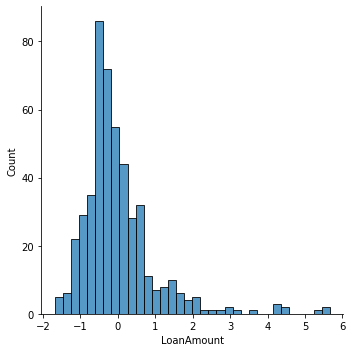

In [23]:
sns.displot(train['ApplicantIncome'])

sns.displot(train['CoapplicantIncome'])

sns.displot(train['LoanAmount'])



### Removing outliers

In [24]:
Q1=train.quantile(0.25)
Q3=train.quantile(0.75)
IQR= Q3-Q1

train = train[~((train< (Q1 - 1.5*IQR))| (train >(Q3 +1.5*IQR)))]

<AxesSubplot:xlabel='LoanAmount'>

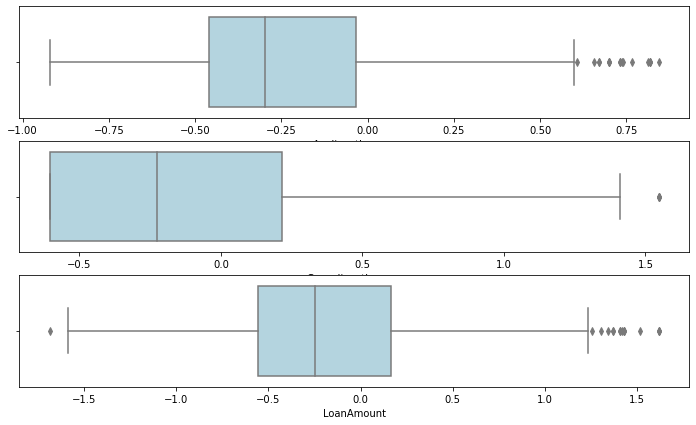

In [25]:
plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
sns.boxplot(x=train.ApplicantIncome,color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x=train.CoapplicantIncome,color='lightblue')


plt.subplot(3,1,3)
sns.boxplot(x=train.LoanAmount,color='lightblue')

In [26]:
train.isnull().sum()

ApplicantIncome      40
CoapplicantIncome    17
LoanAmount           27
Loan_Amount_Term     69
Credit_History       70
NLoan_ID              0
NGender              86
NMarried              0
NDependents           0
NEducation           97
NSelf_Employed       66
NProperty_Area        0
NLoan_Status          0
dtype: int64

In [27]:
Train=train.fillna(IQR)

In [28]:
Train.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
NLoan_ID             0
NGender              0
NMarried             0
NDependents          0
NEducation           0
NSelf_Employed       0
NProperty_Area       0
NLoan_Status         0
dtype: int64

<AxesSubplot:>

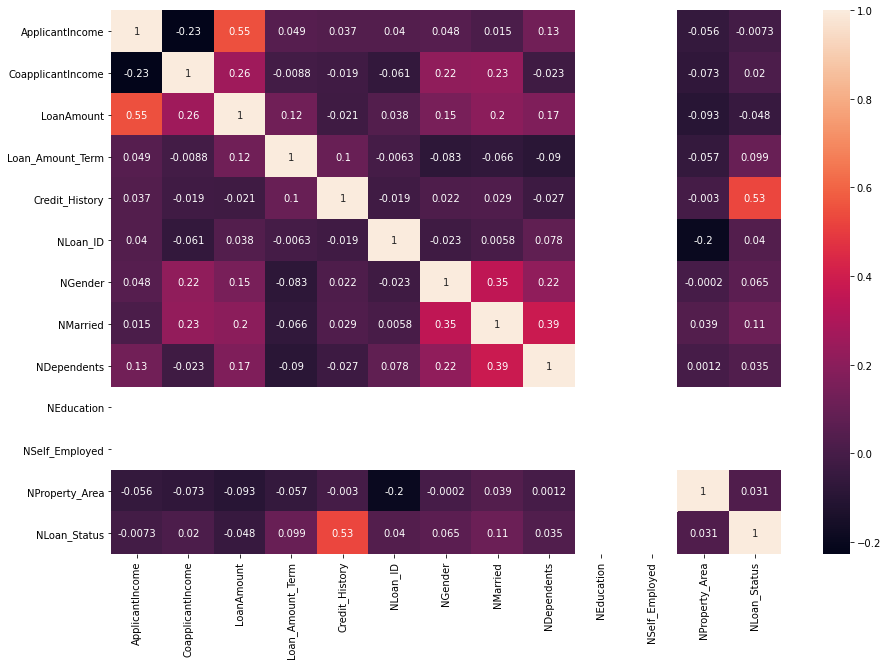

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(Train.corr(),annot=True)

In [30]:
Tcorr=Train.corr()['NLoan_Status']
Tcorr[np.abs(Tcorr) > 0.3]

Credit_History    0.52939
NLoan_Status      1.00000
Name: NLoan_Status, dtype: float64

### Here we get to knoe the Cridit_History coloumn is more important because it is highly correlated with Loan status.

In [31]:
x=Train.drop('NLoan_Status',axis=1)

In [32]:
y=Train['NLoan_Status']

In [33]:
Train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,NLoan_ID,NGender,NMarried,NDependents,NEducation,NSelf_Employed,NProperty_Area,NLoan_Status
1,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,1.0,1,1,0.0,0.0,0,0
2,-0.417536,-0.604633,-0.979001,0.275542,1.0,1,1.0,1,0,0.0,0.0,2,1
3,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1.0,1,0,0.0,0.0,2,1
4,0.112280,-0.604633,-0.046446,0.275542,1.0,3,1.0,0,0,0.0,0.0,2,1
5,0.009319,0.999978,1.520245,0.275542,1.0,4,1.0,1,2,0.0,0.0,2,1


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3,random_state=1234)
from sklearn.metrics import confusion_matrix,accuracy_score

### LogisticRegrassion

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
score=model.score(x,y)
score 


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8041666666666667

In [36]:
pred_train=model.predict(x_test)
pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [37]:
round(accuracy_score(pred_train,y_test),2)*100

80.0

###  Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(x_train,y_train)
model1_pred=model1.predict(x_test)

In [40]:
round(accuracy_score(model1_pred,y_test),2)*100

69.0

### KNN.....

In [41]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
knn_pred=Knn.predict(x_test)

In [42]:
round(accuracy_score(knn_pred,y_test),2)*100

59.0

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
Rnd = RandomForestClassifier(criterion='entropy')
Rnd.fit(x_train,y_train)
Rnd_pred=Rnd.predict(x_test)

In [44]:
round(accuracy_score(Rnd_pred,y_test),2)*100

79.0

### Randon Forest gives highest accuracy

In [45]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
test.shape

(367, 12)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [48]:
test.select_dtypes(include="object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [49]:
test['NLoan_ID']=lb.fit_transform(test['Loan_ID'])
test['NGender']=lb.fit_transform(test['Gender'])
test['NMarried']=lb.fit_transform(test['Married'])
test['NDependents']=lb.fit_transform(test['Dependents'])
test['NEducation']=lb.fit_transform(test['Education'])
test['NSelf_Employed']=lb.fit_transform(test['Self_Employed'])
test['NProperty_Area']=lb.fit_transform(test['Property_Area'])


In [50]:
test.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [51]:
test.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
NLoan_ID              0
NGender               0
NMarried              0
NDependents           0
NEducation            0
NSelf_Employed        0
NProperty_Area        0
dtype: int64

In [52]:
test.dropna(inplace=True)

In [53]:
test.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
NLoan_ID             0
NGender              0
NMarried             0
NDependents          0
NEducation           0
NSelf_Employed       0
NProperty_Area       0
dtype: int64

In [54]:
Final_Rnd_pred=Rnd.predict(test)
Final_Rnd_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
df=pd.DataFrame(Final_Rnd_pred)
df.value_counts()

0    192
1    136
dtype: int64

In [63]:
Loan_Status=lb.inverse_transform(Train['NLoan_Status'])
Loan_Status

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

# Exporting the output values along with id

In [65]:
result= pd.Series(data=Loan_Status,name='predicted_values')
final_result = pd.concat([sample['Loan_ID'],result],axis=1)
final_result.to_csv('Predict_status.csv')

In [ ]:
pwd